# ROC AUC 
https://www.datatechnotes.com/2019/11/how-to-create-roc-curve-in-python.html   
https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/   
https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/  
https://glassboxmedicine.com/2020/07/14/the-complete-guide-to-auc-and-average-precision-simulations-and-visualizations/ 

In [211]:
def create_confusion_matrix(model, X, y, labels):
    from sklearn.metrics import ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import numpy as np

    # normalize confusion matrix
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    for title, normalize in titles_options:
        if normalize == None:
            i = ax1
        else:
            i = ax2
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            X,
            y,
            display_labels=labels,
            cmap=plt.cm.Blues,
            normalize=normalize,
            ax=i,
        )
        disp.ax_.set_title(title)

        plt.grid(False)
        print(title)
        print(disp.confusion_matrix)

    plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report, confusion_matrix, plot_roc_curve
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Import some data to play with
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
df = X.copy()
df['target'] = y
df.sample(frac=1, replace=True, random_state=42)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)
print(Counter(y_train), 'mean: ', y_train.mean().round(4))
print(Counter(y_test), 'mean: ', y_test.mean().round(4))
X_train.head()


Counter({1: 250, 0: 148}) mean:  0.6281
Counter({1: 107, 0: 64}) mean:  0.6257


/Users/oliverdreger/opt/anaconda3/envs/dcr/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
443,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
362,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.12980,0.18390,0.12550,0.08312,0.2744,0.07238
271,11.29,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022


In [237]:
fpr[::-1]


array([0.  , 0.  , 0.  , 0.02, 0.02, 0.05, 0.05, 0.06, 0.06, 0.08, 0.08,
       0.09, 0.09, 1.  ])

In [247]:
import pandas as pd

# fpr[::-1].sort()  # sort descending order
t = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresh})
t
# plt.plot(thresh);


,tpr,fpr,thresholds
0,0.000000,0.000000,1.999941
1,0.009346,0.000000,0.999941
2,0.878505,0.000000,0.973005
3,0.878505,0.015625,0.970456
4,0.925234,0.015625,0.909156
5,0.925234,0.046875,0.800590
6,0.953271,0.046875,0.765748
7,0.953271,0.062500,0.753281
8,0.981308,0.062500,0.704928
9,0.981308,0.078125,0.642970


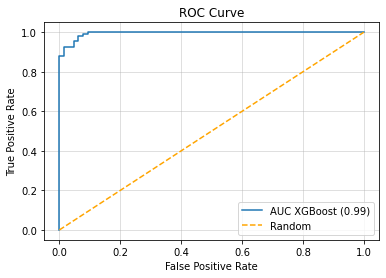

In [271]:
plt.plot(fpr, tpr, label='AUC XGBoost (%0.2f)', % auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='orange', ls='--', label='Random')
plt.legend()
plt.grid(alpha=0.5)


Accuracy Train: 1.0000
ROC AUC Score Train: 1.0000
Accuracy Test: 0.9649
ROC AUC Score Test: 0.9946
AUPRC Test: 0.9968

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        64
           1       0.95      1.00      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

Confusion matrix, without normalization
[[ 58   6]
 [  0 107]]
Normalized confusion matrix
[[0.91 0.09]
 [0.   1.  ]]


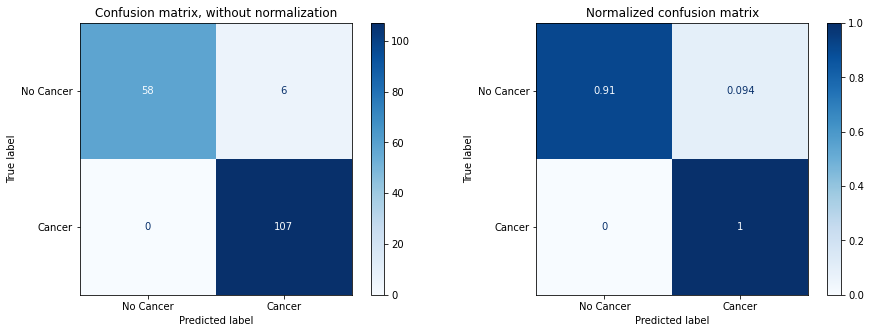

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


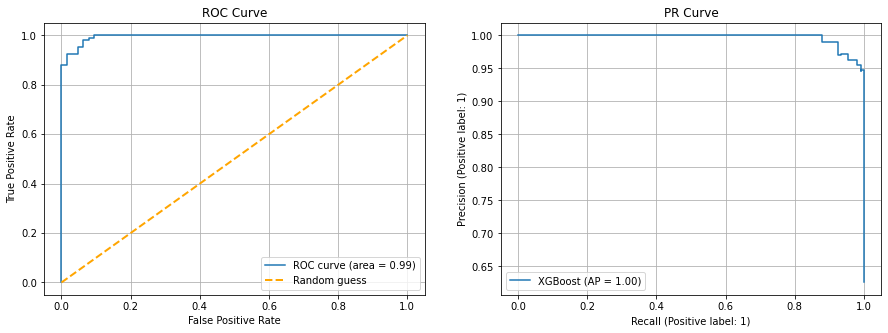

In [273]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


params = {
    'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 3, 'subsample': 0.7
}

model = XGBClassifier(**params, random_state=42, verbosity=0)
# model = LogisticRegression()
model.fit(X_train, y_train)
y_score = model.predict(X_train)
print('Accuracy Train: {0:0.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=y_score)))
y_score = model.predict_proba(X_train)[:, 1]  # proba of positive samples
auc = roc_auc_score(y_train, y_score)
print('ROC AUC Score Train: {0:0.4f}'.format(auc))

y_score = model.predict(X_test)
print('Accuracy Test: {0:0.4f}'.format(
    accuracy_score(y_true=y_test, y_pred=y_score)))
y_score = model.predict_proba(X_test)[:, 1]  # proba of positive samples
auc = roc_auc_score(y_test, y_score)
print('ROC AUC Score Test: {0:0.4f}'.format(auc))
auprc = average_precision_score(y_test, model.predict_proba(X_test)[:, 1])
print('AUPRC Test: {0:0.4f}\n'.format(auprc))

# print(model)

print(classification_report(y_test, model.predict(X_test)))
create_confusion_matrix(model, X_test, y_test, ['No Cancer', 'Cancer'])

fpr, tpr, thresh = roc_curve(
    y_true=y_test, y_score=model.predict_proba(X_test)[:, 1])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(fpr, tpr, label='ROC Curve (area = %.2f)' % auc)
ax1.plot([0, 1], [0, 1], linestyle='--', lw=2,
         color='orange', label='Random guess')
ax1.set_title('ROC Curve')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.grid()
ax1.legend()
ax2.set_title('PR Curve')
ax2.set_xlabel('Recall: Positive Label 1')
ax2.set_ylabel('Precision: Positive Label 1')
ax2.grid()
ax2.legend()

display = PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test, name="XGBoost", ax=ax2
)


In [283]:
x1 = 6 / (10000+6)
x2 = 1 / (10000+1)
print('FPR={0:0.6f}'.format(x1))
print('FPR={0:0.6f}'.format(x2))


FPR=0.000600
FPR=0.000100
